In [1]:
import numpy as np
from scipy.sparse import lil_matrix
import scipy.stats as sts
import numpy

In [2]:
cycledistfile = "cycleslensdistribution.txt"


In [3]:
cycledistdata = lil_matrix(np.loadtxt(cycledistfile), dtype = 'int', shape = (1000000, 100))

### Рассмотрим распределение числа циклов длины 4

In [4]:
k = 4
datalen4 = cycledistdata.transpose().getrow(k-1).toarray()[0]

### Для моделирования распределения pvalues разобьём наблюдения на 1000 групп

In [5]:
datalen4resh = datalen4.reshape((1000,1000))

### Проверяем гипотезу о том, что выборка взята из распределения Пуассона с параметром $\frac{1}{4}$
### Критерий хи-квадрат говорит, что значимых различий между выборкой и распределением буквально нет

### Ниже представлено вычисление статистики критерия хи-квадрат
### Для $k=4$ группировка состояний приводит к трём состояниям
### Замечание: библиотечная функция для критерия хи-квадрат не учитывает размер выборки
### Нужное значение получаем умножением на размер выборки

In [6]:
pvalues = list()
for i in range(1000):
    freqs = np.bincount(datalen4resh[:,i])/datalen4resh.shape[0]
    maxvalue = datalen4resh[:,i].max()
    probs = sts.poisson.pmf(np.arange(0, maxvalue + 1), 1/k)

    grouped_freqs = np.array([freqs[0],freqs[1],freqs[2:].sum()])
    grouped_probs = np.array([probs[0],probs[1],probs[2:].sum()])

    chi_squareval = 1000 * (sts.chisquare(grouped_freqs, grouped_probs)).statistic
    pvalues.append(sts.chi2.sf(chi_squareval, np.count_nonzero(grouped_probs)-1))

### Видим, что распределение pvalues равномерное, что означает, что перестановки промоделированы правильно

(array([1.08309721, 0.9527244 , 1.0429825 , 1.00286779, 0.98281044,
        1.16332664, 0.81232291, 0.92263837, 1.10315457, 0.96275308]),
 array([7.16658833e-05, 9.97857068e-02, 1.99499748e-01, 2.99213789e-01,
        3.98927830e-01, 4.98641871e-01, 5.98355912e-01, 6.98069953e-01,
        7.97783993e-01, 8.97498034e-01, 9.97212075e-01]),
 <BarContainer object of 10 artists>)

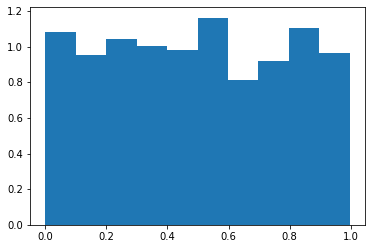

In [7]:
import matplotlib.pyplot as plt
plt.hist(pvalues, density=True)

----------------------------------------------

In [8]:
elementdist15input = "elementpositiondist.txt"

### Рассмотрим распределение 15-ого по счёту от нуля элемента в перестановках
### Предполагается, что оно равномерное

In [9]:
elementdist15data = np.loadtxt(elementdist15input, dtype = "int")

In [10]:
elementdist15data_grouped = elementdist15data.reshape(100,1000)

### Объединять состояния по критерию $np_i \ge 5$ в случае равномерного распределения просто
### Вероятность каждого наблюдения (длина перестановок $1000$, длина выборок в группах $100$) равна $0.001$
### Тогда мы просто собираем состояния в группы по 50

In [14]:
pvalues = list()
for i in range(1000):
    freqs = np.bincount(elementdist15data_grouped[:,i])/elementdist15data_grouped.shape[0]
    maxvalue = 1000

    grouped_freqs = np.array([freqs[k:k+50].sum() for k in range(0,1000,50)])
    chi_squareval = 100 * (sts.chisquare(grouped_freqs)).statistic
    pvalues.append(sts.chi2.sf(chi_squareval, 19))### степеней свобод 1000/50 - 1 = 19

(array([0.86, 0.9 , 0.99, 1.22, 1.25, 0.86, 0.99, 0.93, 1.08, 0.92]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

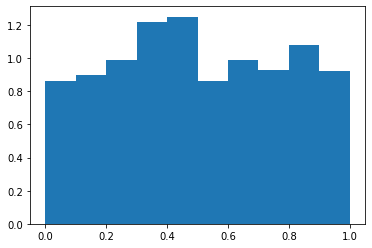

In [15]:
plt.hist(pvalues, density=True, range=(0,1))

### Провели аналогичные действия для вычисления pvalues для критерия хи-квадрат проверки равномерности распределения позиции 15-ого элемента в перестановках
### Распределение pvalues равномерное